In [ ]:
# import pandas, numpy, sklearn

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
# pandas read csv
# rewrite df into cdf
# cdf.head(2)

In [83]:
df = pd.read_csv('FuelConsumptionCo2.csv')
filter_df = ['VEHICLECLASS',
            'ENGINESIZE',
            'CYLINDERS',
            'FUELCONSUMPTION_CITY',
            'FUELCONSUMPTION_HWY',
            'FUELCONSUMPTION_COMB',
            'CO2EMISSIONS']
cdf = df[filter_df]
cdf.head(2)

,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,COMPACT,2.0,4,9.9,6.7,8.5,196
1,COMPACT,2.4,4,11.2,7.7,9.6,221


In [27]:
# list(df.columns)

In [12]:
# x_col = 'column1'
# y_col = 'column2'
# plt.scatter(cdf.x_col, cdf.y_col)
# plt.x_label(x_col)
# plt.y_label(y_col)
# plt.show()

In [84]:
x_col = 'ENGINESIZE'
y_col = 'CO2EMISSIONS'
# plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='navy')
# plt.xlabel(x_col)
# plt.ylabel(y_col)
# plt.show()

In [85]:
split = np.random.rand(len(df)) < .8
training_set = cdf[split]
test_set = cdf[~split]

In [86]:
# determine features from df columns
# list(cdf.columns)
features =  ['ENGINESIZE']

predicted_value = ['CO2EMISSIONS']

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
clf = LinearRegression()

In [70]:
# set training set 
# train_x = training_set[features]
# train_y = training_set[predicted_value]

# test_x = test_set[features]
# test_y = test_set[predicted_value]



# transform train_x array into a poly matrix
# poly_vector_x = PolynomialFeatures(train_x)

In [109]:
train_x = np.asanyarray(training_set[features])
train_y = np.asanyarray(training_set[predicted_value])

test_x = np.asanyarray(test_set[features])
test_y = np.asanyarray(test_set[predicted_value])

# transform single array train_x array into 4 vectors  poly matrix
poly_vector = PolynomialFeatures(degree=3)
train_x_poly = poly_vector.fit_transform(train_x)
train_x_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [ ]:
# determine intercept and coefficients by fitting transformed training_x and train_y 
# clf.fit(poly_vector_x, train_y)
# clf.coef_ # first index of array is 0, len of out is determined by degree in which was transformed
# clf.intercept_ # y intercept

In [89]:
clf.fit(train_x_poly, train_y)
print('equation intercept', clf.intercept_[0])
print('equation coeficients', clf.coef_[0]) # first index is ommited

equation intercept 129.27136267117953
equation coeficients [ 0.         28.52312301  4.50961014 -0.48412225]


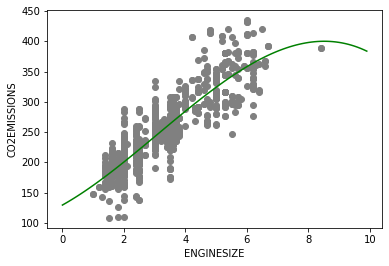

In [105]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='grey')

# overlay poly equation
X = np.arange(0.0, 10.0, 0.1) 
Y = clf.intercept_ + (clf.coef_[0][1]*X) + (clf.coef_[0][2]*np.power(X,2)) + (clf.coef_[0][3]*np.power(X,3))
plt.plot(X, Y, '-g')

plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

evaluation


In [121]:
from sklearn.metrics import r2_score

# create poly vectors using test data
test_poly_x = poly_vector.fit_transform(test_x)

# predict outcomes of test_x
test_y_hat = clf.predict(test_poly_x)

# Mean Absolute Error = test(predicted) - test(actual) 
MAE = np.mean(np.absolute(test_y_hat - test_y))

# Mean Sum of Squares = mean( (predicted - actual) ^ 2 )
MSE = np.mean((test_y_hat - test_y) ** 2)

R2_score = r2_score(test_y_hat, test_y)

print("Mean Absolute Error = %.2f" %MAE)
print("Mean Sum Error      = %.2f" %MSE)
print("r2 score            = %.2f" %R2_score)



Mean Absolute Error = 22.70
Mean Sum Error      = 902.43
r2 score            = 0.72
